<a href="https://colab.research.google.com/github/AbrilPaes/Machine-learning/blob/main/Pr%C3%A1cticaRedesMLP_1_DeepLearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<a href="https://colab.research.google.com/github/DCDPUAEM/DCDP/blob/main/04%20Deep%20Learning/notebooks/Practica-1-MLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

✅ Conectar la notebook en modo GPU

Entorno de ejecución → Cambiar tipo de entorno de ejecución

Algunas consideraciones:

* No dejar la notebook conectada sin actividad ya que Colab penaliza esto al asignar un entorno con GPU.
* No pedir el entorno con GPU si no se va a usar.

---

# ⭕ Parte I

Usando el mismo dataset MNIST de Keras, implementa las siguientes redes neuronales de tipo MLP:

* 1 capa oculta de 200 neuronas sin activación. Entrena durante 30 épocas.
* 1 capa oculta de 200 neuronas con activación $tanh$. Entrena durante 30 épocas.
* 3 capas ocultas de 100, 200 y 100 neuronas respectivamente, todas con activación ReLU. Entrena durante 50 épocas.

En cada uno de los experimentos determina las especificaciones de las capas de entrada y salida. Además, en cada caso, reporta el accuracy y recall en el conjunto de prueba, así como las curvas de entrenamiento (perdida y accuracy).

* Con el objetivo de subir la métrica de accuracy en el conjunto de prueba, entrena un nuevo módelo de red neuronal MLP cambiando los siguientes hiperparámetros:

 * Número de capas ocultas.
 * Número de neuronas en cada capa oculta.
 * Función de activación de cada capa oculta.
 * Optimizador ([opciones](https://keras.io/api/optimizers/)).


---


Como referencia, el mejor resultado hasta ahora, sin usar redes convolucionales, es un accuracy de 99.65% (https://arxiv.org/abs/1003.0358)

Lista de resultados: http://yann.lecun.com/exdb/mnist/, https://paperswithcode.com/sota/image-classification-on-mnist

## El conjunto de datos

In [1]:
import numpy as np
from keras.datasets import mnist
from tensorflow.keras.utils import to_categorical


(X_train, y_train), (X_test, y_test) = mnist.load_data()

print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_test shape: {y_test.shape}")

y_test_original = y_test.copy()  # Esta copia la usarás para hacer las evaluaciones de las métricas de rendimiento

y_train = to_categorical(y_train,num_classes=10)
y_test = to_categorical(y_test,num_classes=10)

11490434/11490434 [==============================] - 1s 0us/step
X_train shape: (60000, 28, 28)
y_train shape: (60000,)
X_test shape: (10000, 28, 28)
y_test shape: (10000,)


## Tu trabajo

Epoch 1/30
1875/1875 [==============================] - 17s 7ms/step - loss: 17.3978 - accuracy: 0.8560 - val_loss: 5.4907 - val_accuracy: 0.8877
Epoch 2/30
1875/1875 [==============================] - 8s 5ms/step - loss: 3.3982 - accuracy: 0.8694 - val_loss: 2.3386 - val_accuracy: 0.8441
Epoch 3/30
1875/1875 [==============================] - 6s 3ms/step - loss: 1.7595 - accuracy: 0.8527 - val_loss: 1.5175 - val_accuracy: 0.8633
Epoch 4/30
1875/1875 [==============================] - 5s 3ms/step - loss: 1.7196 - accuracy: 0.8480 - val_loss: 1.7110 - val_accuracy: 0.8584
Epoch 5/30
1875/1875 [==============================] - 6s 3ms/step - loss: 1.7528 - accuracy: 0.8543 - val_loss: 1.7883 - val_accuracy: 0.8499
Epoch 6/30
1875/1875 [==============================] - 5s 3ms/step - loss: 1.7980 - accuracy: 0.8605 - val_loss: 1.6948 - val_accuracy: 0.8717
Epoch 7/30
1875/1875 [==============================] - 6s 3ms/step - loss: 1.8818 - accuracy: 0.8635 - val_loss: 1.6643 - val_accurac

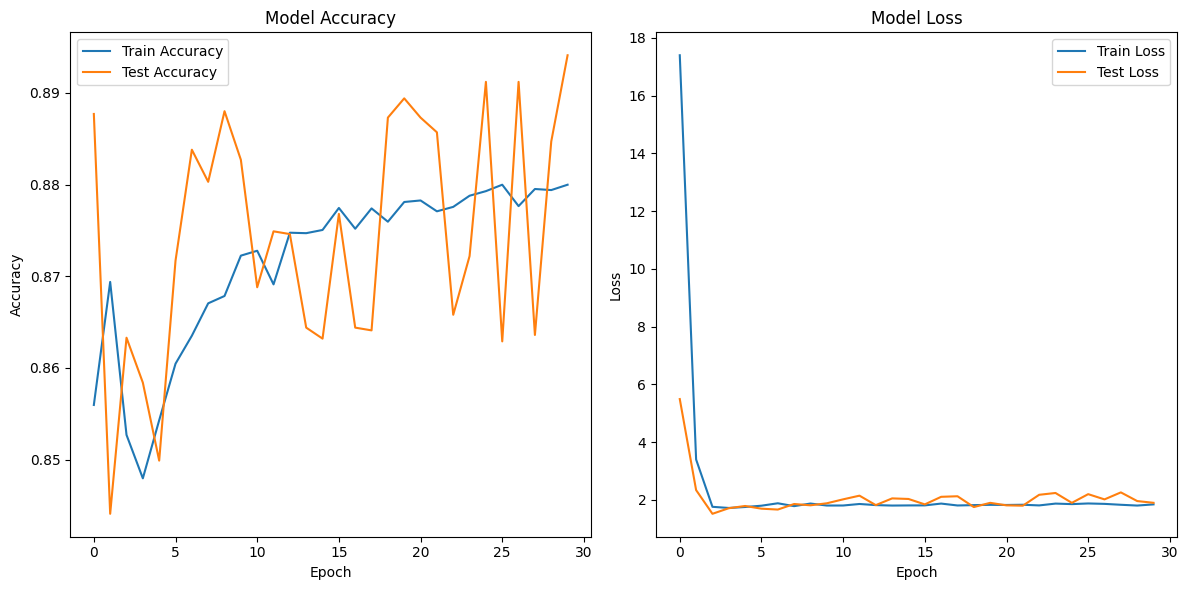

In [2]:
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense

# Definir el modelo MLP
model = Sequential()
model.add(Dense(200, input_shape=(28 * 28,), activation=None))  # Capa oculta sin activación
model.add(Dense(10, activation='softmax'))  # Capa de salida con activación softmax

# Compilar el modelo
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Entrenar el modelo
history = model.fit(X_train.reshape(-1, 28 * 28), y_train, epochs=30, batch_size=32, validation_data=(X_test.reshape(-1, 28 * 28), y_test), verbose=1)

# Evaluar el modelo - conjunto de prueba
loss, accuracy = model.evaluate(X_test.reshape(-1, 28 * 28), y_test, verbose=0)
print(f'Accuracy en el conjunto de prueba: {accuracy:.4f}')

# Obtener predicciones
y_pred = model.predict(X_test.reshape(-1, 28 * 28))
y_pred_classes = np.argmax(y_pred, axis=1)
y_test_classes = np.argmax(y_test, axis=1)

# Calcular recall
from sklearn.metrics import recall_score
recall = recall_score(y_test_classes, y_pred_classes, average='macro')
print(f'Recall en el conjunto de prueba: {recall:.4f}')

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Test Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

Epoch 1/30
1875/1875 [==============================] - 12s 6ms/step - loss: 0.5294 - accuracy: 0.8423 - val_loss: 0.3845 - val_accuracy: 0.8807
Epoch 2/30
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3843 - accuracy: 0.8851 - val_loss: 0.3632 - val_accuracy: 0.8910
Epoch 3/30
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3699 - accuracy: 0.8867 - val_loss: 0.3511 - val_accuracy: 0.8937
Epoch 4/30
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3386 - accuracy: 0.8963 - val_loss: 0.3190 - val_accuracy: 0.9038
Epoch 5/30
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3205 - accuracy: 0.9013 - val_loss: 0.3050 - val_accuracy: 0.9049
Epoch 6/30
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3096 - accuracy: 0.9054 - val_loss: 0.2933 - val_accuracy: 0.9123
Epoch 7/30
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2904 - accuracy: 0.9106 - val_loss: 0.2492 - val_accuracy

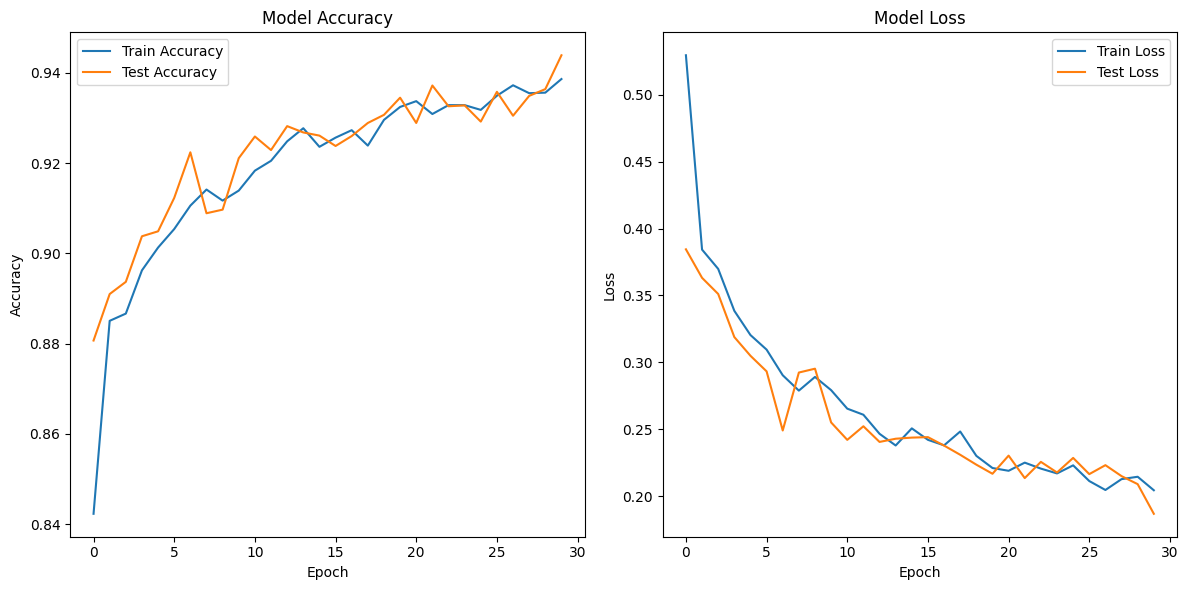

In [3]:
# Definir el modelo MLP con capa oculta de 200 neuronas y activación 'tanh'
model = Sequential()
model.add(Dense(200, input_shape=(28 * 28,), activation='tanh'))  # Capa oculta y activación tanh
model.add(Dense(10, activation='softmax'))  # salida

# modelo
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Entrenar el modelo
history = model.fit(X_train.reshape(-1, 28 * 28), y_train, epochs=30, batch_size=32, validation_data=(X_test.reshape(-1, 28 * 28), y_test), verbose=1)

# Evaluar el modelo - conjunto de prueba
loss, accuracy = model.evaluate(X_test.reshape(-1, 28 * 28), y_test, verbose=0)
print(f'Accuracy en el conjunto de prueba: {accuracy:.4f}')

#predicciones
y_pred = model.predict(X_test.reshape(-1, 28 * 28))
y_pred_classes = np.argmax(y_pred, axis=1)
y_test_classes = np.argmax(y_test, axis=1)

#recall
from sklearn.metrics import recall_score
recall = recall_score(y_test_classes, y_pred_classes, average='macro')
print(f'Recall en el conjunto de prueba: {recall:.4f}')

plt.figure(figsize=(12, 6))

#accuracy -acierto
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Test Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

#loss-incorrecto
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

Epoch 1/50
1875/1875 [==============================] - 11s 4ms/step - loss: 0.9366 - accuracy: 0.8706 - val_loss: 0.2756 - val_accuracy: 0.9281
Epoch 2/50
1875/1875 [==============================] - 11s 6ms/step - loss: 0.2189 - accuracy: 0.9393 - val_loss: 0.2369 - val_accuracy: 0.9458
Epoch 3/50
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1672 - accuracy: 0.9530 - val_loss: 0.1846 - val_accuracy: 0.9512
Epoch 4/50
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1379 - accuracy: 0.9617 - val_loss: 0.1646 - val_accuracy: 0.9596
Epoch 5/50
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1191 - accuracy: 0.9668 - val_loss: 0.2306 - val_accuracy: 0.9491
Epoch 6/50
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1054 - accuracy: 0.9709 - val_loss: 0.1375 - val_accuracy: 0.9649
Epoch 7/50
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0987 - accuracy: 0.9729 - val_loss: 0.1439 - val_accurac

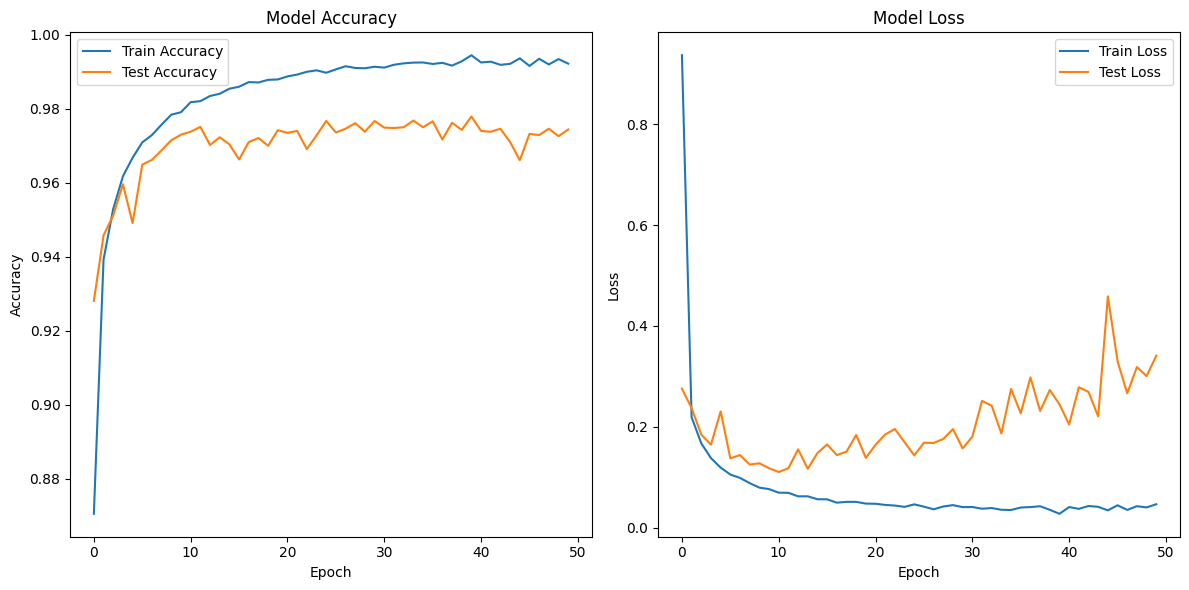

In [4]:
# Definir el modelo MLP con 3 capas ocultas de activación ReLU
model = Sequential()
model.add(Dense(100, input_shape=(28 * 28,), activation='relu'))  # capa oculta con activación ReLU
model.add(Dense(200, activation='relu'))  # capa oculta con activación ReLU
model.add(Dense(100, activation='relu'))  # capa oculta con activación ReLU
model.add(Dense(10, activation='softmax'))  # Capa de salida - activación softmax

# Compilar el modelo
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Entrenar el modelo
history = model.fit(X_train.reshape(-1, 28 * 28), y_train, epochs=50, batch_size=32, validation_data=(X_test.reshape(-1, 28 * 28), y_test), verbose=1)

# Evaluar el modelo en el conjunto de prueba
loss, accuracy = model.evaluate(X_test.reshape(-1, 28 * 28), y_test, verbose=0)
print(f'Accuracy en el conjunto de prueba: {accuracy:.4f}')

# Obtener predicciones
y_pred = model.predict(X_test.reshape(-1, 28 * 28))
y_pred_classes = np.argmax(y_pred, axis=1)
y_test_classes = np.argmax(y_test, axis=1)

# Calcular recall
from sklearn.metrics import recall_score
recall = recall_score(y_test_classes, y_pred_classes, average='macro')
print(f'Recall en el conjunto de prueba: {recall:.4f}')

# Graficar curvas de entrenamiento
plt.figure(figsize=(12, 6))

# Plot accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Test Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

# ⭕ Parte II

Tomando como referencia la [notebook](https://github.com/DCDPUAEM/DCDP/blob/main/04%20Deep%20Learning/notebooks/02-MLP-Regresion.ipynb) de MLP para regresión, realiza las siguientes tareas. En las primeras 5 tareas el objetivo es experimentar y reflexionar sobre el efecto de distintos aspectos del entrenamiento en el rendimiento del modelo.

1. Repite el entrenamiendo del modelo usando 100 épocas **sin normalizar los datos**, ¿qué le sucede a las métricas de rendimiento y curvas de entrenamiento?

2. Repite el entrenamiendo del modelo usando 100 épocas, normalización de los datos y **con alguna función de activación en la capa de salida (tanh o sigmoide)**, ¿qué le sucede a las métricas de rendimiento y curvas de entrenamiento?

4. Repite el entrenamiendo del modelo usando 100 épocas, normalización de los datos y **con la función de activación ReLU en la capa de salida**, ¿qué le sucede a las métricas de rendimiento y curvas de entrenamiento?

5. Comprueba el modelo que entrenamos en la notebook (con 100 épocas, normalización y sin función de activación en la salida) con los siguientes algoritmos de ML clásico:
 * Regresión Lineal
 * Regresión Polinomial
 * Regresor KNN
 Comprueba los modelos usando MAE en el conjunto de prueba. ¿Cuál tuvo mejor desempeño?  

El objetivo en la siguiente tarea es experimentar para encontrar un mejor modelo que suba las métricas de rendimiento del modelo. **Cuidado con el overfitting.**

5. Usando los datos normalizados, prueba con diferentes combinaciones de los parámetros del módelo:
    * Número de capas ocultas
    * Número de nueronas en las capas ocultas
    * Funciones de activación de las capas ocultas
    * Optimizador y tasa de entrenamiento

 Puedes hacer el modelo más sencillo o más complejo. Reporta la combinación de parámetros que produjo el mejor resultado.

En esta última tarea probaras cómo es recibir nuevos datos para realizar predicciones con tu mejor modelo que hayas obtenido.

6. Ya que tengas tu mejor modelo, toma el archivo `mpg_new_data.csv` del repositorio y obten las predicciones para estos datos. Compararemos contra los valores reales. **Guarda estas predicciones en un archivo CSV, que también adjuntarás en la entrega de la actividad**.

## El conjunto de datos

Cargamos, limpiamos y separamos los datos

In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split

url = "https://raw.githubusercontent.com/DCDPUAEM/DCDP/main/04%20Deep%20Learning/data/auto-mpg.data"

df = pd.read_csv(url,
                header=0,
                index_col=0,
                na_values = "?",
                comment='\t',
                skipinitialspace=True)

df = df.dropna()
df = pd.get_dummies(data=df,columns=['Origin'],
                       drop_first=True,dtype=int)
df.rename(columns={'Origin_2':'Europe',
                   'Origin_3':'Japan'},
             inplace=True)
display(df)

X = df.iloc[:,1:].values
y = df['MPG'].values

print(f"Shapes de X y y: {X.shape}, {y.shape}")

X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.85,random_state=189)

print(f"Train size: {X_train.shape[0]}")
print(f"Test size: {X_test.shape[0]}")

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Europe,Japan
0,18.0,8,307.0,130.0,3504.0,12.0,70,0,0
1,15.0,8,350.0,165.0,3693.0,11.5,70,0,0
2,18.0,8,318.0,150.0,3436.0,11.0,70,0,0
3,16.0,8,304.0,150.0,3433.0,12.0,70,0,0
4,17.0,8,302.0,140.0,3449.0,10.5,70,0,0
...,...,...,...,...,...,...,...,...,...
391,36.0,4,135.0,84.0,2370.0,13.0,82,0,0
392,27.0,4,151.0,90.0,2950.0,17.3,82,0,0
393,27.0,4,140.0,86.0,2790.0,15.6,82,0,0
394,44.0,4,97.0,52.0,2130.0,24.6,82,1,0


Shapes de X y y: (390, 8), (390,)
Train size: 331
Test size: 59


## Tu trabajo

Epoch 1/100
11/11 [==============================] - 2s 16ms/step - loss: 15379.0820 - val_loss: 2954.5969
Epoch 2/100
11/11 [==============================] - 0s 7ms/step - loss: 4174.9629 - val_loss: 5301.8848
Epoch 3/100
11/11 [==============================] - 0s 7ms/step - loss: 1847.7898 - val_loss: 887.2617
Epoch 4/100
11/11 [==============================] - 0s 7ms/step - loss: 638.4233 - val_loss: 337.9709
Epoch 5/100
11/11 [==============================] - 0s 9ms/step - loss: 377.6272 - val_loss: 408.7493
Epoch 6/100
11/11 [==============================] - 0s 6ms/step - loss: 258.7552 - val_loss: 324.9262
Epoch 7/100
11/11 [==============================] - 0s 6ms/step - loss: 195.8882 - val_loss: 195.6373
Epoch 8/100
11/11 [==============================] - 0s 5ms/step - loss: 158.3679 - val_loss: 177.3180
Epoch 9/100
11/11 [==============================] - 0s 7ms/step - loss: 142.8598 - val_loss: 142.6899
Epoch 10/100
11/11 [==============================] - 0s 6ms/step 

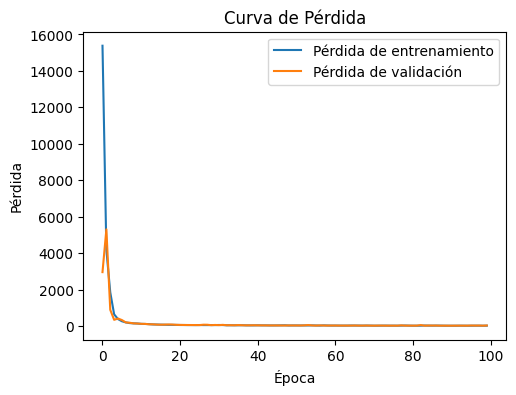

In [6]:
#1. Repite el entrenamiendo del modelo usando 100 épocas sin normalizar los datos

from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt


# Definir el modelo MLP
model = Sequential()
model.add(Dense(200, input_dim=X_train.shape[1], activation=None))  # Capa oculta de 200 neuronas sin activación
model.add(Dense(1, activation='linear'))  # Capa de salida para regresión

# Compilar el modelo
model.compile(optimizer='adam', loss='mean_squared_error')

# Entrenar el modelo
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test))

# Evaluación del modelo
test_loss = model.evaluate(X_test, y_test)

print(f'Loss en datos de prueba: {test_loss}')

# Graficar las curvas de pérdida
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Pérdida de entrenamiento')
plt.plot(history.history['val_loss'], label='Pérdida de validación')
plt.xlabel('Época')
plt.ylabel('Pérdida')
plt.title('Curva de Pérdida')
plt.legend()
plt.show()

Epoch 1/100
11/11 [==============================] - 1s 25ms/step - loss: 603.3499 - val_loss: 554.7762
Epoch 2/100
11/11 [==============================] - 0s 8ms/step - loss: 584.7509 - val_loss: 543.6401
Epoch 3/100
11/11 [==============================] - 0s 10ms/step - loss: 576.8366 - val_loss: 539.4712
Epoch 4/100
11/11 [==============================] - 0s 7ms/step - loss: 573.4291 - val_loss: 537.6783
Epoch 5/100
11/11 [==============================] - 0s 7ms/step - loss: 571.8287 - val_loss: 536.7288
Epoch 6/100
11/11 [==============================] - 0s 8ms/step - loss: 570.8968 - val_loss: 536.1909
Epoch 7/100
11/11 [==============================] - 0s 9ms/step - loss: 570.3351 - val_loss: 535.8354
Epoch 8/100
11/11 [==============================] - 0s 8ms/step - loss: 569.9558 - val_loss: 535.5786
Epoch 9/100
11/11 [==============================] - 0s 8ms/step - loss: 569.6799 - val_loss: 535.3908
Epoch 10/100
11/11 [==============================] - 0s 10ms/step - lo

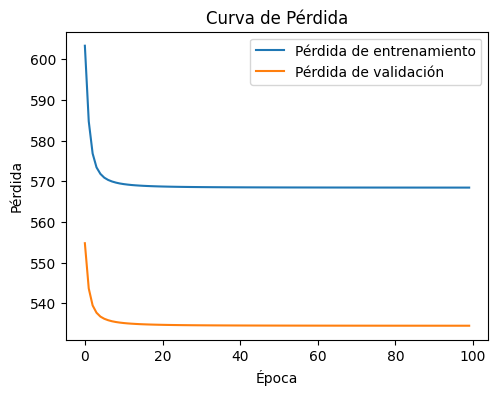

In [7]:
# 2.Repite el entrenamiendo del modelo usando 100 épocas,
#normalización de los datos y con alguna función de activación en la capa de salida (tanh o sigmoide),
#¿qué le sucede a las métricas de rendimiento y curvas de entrenamiento?

# Normalización
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# modelo MLP
model = Sequential()
model.add(Dense(200, input_dim=X_train.shape[1], activation='relu'))  # 200 neuronas y activación ReLU
model.add(Dense(1, activation='tanh'))  # Capa de salida y activación tanh

# Compilar el modelo
model.compile(optimizer='adam', loss='mean_squared_error')

# Entrena modelo
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test))

# evaluar modelo
test_loss = model.evaluate(X_test, y_test)

print(f'Loss en datos de prueba: {test_loss}')

#curvas de pérdida
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Pérdida de entrenamiento')
plt.plot(history.history['val_loss'], label='Pérdida de validación')
plt.xlabel('Época')
plt.ylabel('Pérdida')
plt.title('Curva de Pérdida')
plt.legend()
plt.show()

Epoch 1/100
11/11 [==============================] - 2s 57ms/step - loss: 589.3864 - val_loss: 538.6287
Epoch 2/100
11/11 [==============================] - 0s 12ms/step - loss: 562.8526 - val_loss: 510.5259
Epoch 3/100
11/11 [==============================] - 0s 9ms/step - loss: 535.2791 - val_loss: 481.5376
Epoch 4/100
11/11 [==============================] - 0s 16ms/step - loss: 506.6191 - val_loss: 450.7042
Epoch 5/100
11/11 [==============================] - 0s 21ms/step - loss: 475.2596 - val_loss: 417.3886
Epoch 6/100
11/11 [==============================] - 0s 15ms/step - loss: 440.7900 - val_loss: 381.3650
Epoch 7/100
11/11 [==============================] - 0s 12ms/step - loss: 403.2149 - val_loss: 342.0547
Epoch 8/100
11/11 [==============================] - 0s 9ms/step - loss: 363.1064 - val_loss: 300.8481
Epoch 9/100
11/11 [==============================] - 0s 10ms/step - loss: 321.3855 - val_loss: 258.1261
Epoch 10/100
11/11 [==============================] - 0s 13ms/step

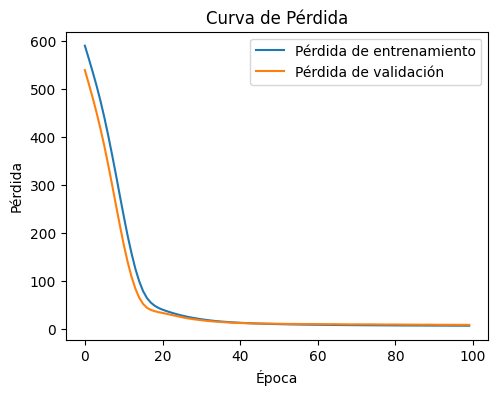

In [8]:
#Repite el entrenamiendo del modelo usando 100 épocas, normalización de los datos y con la función de activación ReLU en la capa de salida,
#¿qué le sucede a las métricas de rendimiento y curvas de entrenamiento?

# Normalización
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# modelo MLP
model = Sequential()
model.add(Dense(200, input_dim=X_train.shape[1], activation='relu'))  # Capa oculta de 200 neuronas y activación ReLU
model.add(Dense(1, activation='relu'))  # Capa salida y activación ReLU

# Compilar
model.compile(optimizer='adam', loss='mean_squared_error')

# Entrenamiento
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test))

# Evaluación
test_loss = model.evaluate(X_test, y_test)

print(f'Loss en datos de prueba: {test_loss}')

#Gráficar
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Pérdida de entrenamiento')
plt.plot(history.history['val_loss'], label='Pérdida de validación')
plt.xlabel('Época')
plt.ylabel('Pérdida')
plt.title('Curva de Pérdida')
plt.legend()
plt.show()



In [9]:
#Comprueba el modelo que entrenamos en la notebook (con 100 épocas, normalización y
#sin función de activación en la salida) con los siguientes algoritmos de ML clásico:
#Regresión Lineal
#Regresión Polinomial
#Regresor KNN Comprueba los modelos usando MAE en el conjunto de prueba. ¿Cuál tuvo mejor desempeño?


# Normalizar los datos
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Definir el modelo MLP
model = Sequential()
model.add(Dense(200, input_dim=X_train.shape[1], activation='relu'))  # Capa oculta de 200 neuronas con activación ReLU
model.add(Dense(1, activation='linear'))  # Capa de salida con activación lineal

# Compilar el modelo
model.compile(optimizer='adam', loss='mean_squared_error')

# Entrenar el modelo
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test))

# Evaluación del modelo
test_loss = model.evaluate(X_test, y_test)

print(f'Loss en datos de prueba: {test_loss}')

# Predicción con el modelo MLP
y_pred_mlp = model.predict(X_test)

Epoch 1/100
11/11 [==============================] - 1s 17ms/step - loss: 591.5876 - val_loss: 538.2769
Epoch 2/100
11/11 [==============================] - 0s 5ms/step - loss: 561.4028 - val_loss: 507.4656
Epoch 3/100
11/11 [==============================] - 0s 8ms/step - loss: 531.1892 - val_loss: 475.1582
Epoch 4/100
11/11 [==============================] - 0s 5ms/step - loss: 497.8443 - val_loss: 440.6849
Epoch 5/100
11/11 [==============================] - 0s 7ms/step - loss: 462.4594 - val_loss: 402.9802
Epoch 6/100
11/11 [==============================] - 0s 7ms/step - loss: 423.9236 - val_loss: 361.6924
Epoch 7/100
11/11 [==============================] - 0s 5ms/step - loss: 381.7435 - val_loss: 317.9101
Epoch 8/100
11/11 [==============================] - 0s 5ms/step - loss: 337.2776 - val_loss: 273.1373
Epoch 9/100
11/11 [==============================] - 0s 6ms/step - loss: 292.5822 - val_loss: 228.8113
Epoch 10/100
11/11 [==============================] - 0s 5ms/step - loss

In [10]:
#Regresión Polinomial
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

# Regresión Lineal
regL = LinearRegression()
regL.fit(X_train, y_train)
y_pred_lr = regL.predict(X_test)
mae_lr = mean_absolute_error(y_test, y_pred_lr)
print(f'MAE de Regresión Lineal: {mae_lr}')




MAE de Regresión Lineal: 2.9241866001653967


In [11]:
from sklearn.neighbors import KNeighborsRegressor

# Regresor KNN
knn_reg = KNeighborsRegressor(n_neighbors=5)  # Puedes ajustar el número de vecinos
knn_reg.fit(X_train, y_train)
y_pred_knn = knn_reg.predict(X_test)
mae_knn = mean_absolute_error(y_test, y_pred_knn)
print(f'MAE de Regresor KNN: {mae_knn}')

MAE de Regresor KNN: 2.413898305084746


In [12]:
mae_mlp = mean_absolute_error(y_test, y_pred_mlp)
print(f'MAE del modelo MLP: {mae_mlp}')

MAE del modelo MLP: 2.055654790845968


Usando los datos normalizados, prueba con diferentes combinaciones de los parámetros del módelo:

Número de capas ocultas
Número de nueronas en las capas ocultas
Funciones de activación de las capas ocultas
Optimizador y tasa de entrenamiento

In [13]:
from sklearn.preprocessing import StandardScaler

# Normalización
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [14]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

# Prueba 1
model1 = Sequential()
model1.add(Dense(200, input_dim=X_train.shape[1], activation='relu'))
model1.add(Dense(1, activation='linear'))

model1.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')

# Entrenamiento
history1 = model1.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test), verbose=0)

# Evaluación
test_loss1 = model1.evaluate(X_test, y_test, verbose=0)
print(f'Modelo 1 - Pérdida en datos de prueba: {test_loss1}')


Modelo 1 - Pérdida en datos de prueba: 8.657760620117188


In [15]:
from tensorflow.keras.optimizers import SGD

# Prueba 2
model2 = Sequential()
model2.add(Dense(100, input_dim=X_train.shape[1], activation='relu'))
model2.add(Dense(50, activation='relu'))
model2.add(Dense(1, activation='linear'))

model2.compile(optimizer=SGD(learning_rate=0.01), loss='mean_squared_error')

# Entrenamiento
history2 = model2.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test), verbose=0)

# Evaluación
test_loss2 = model2.evaluate(X_test, y_test, verbose=0)
print(f'Modelo 2 - Pérdida en datos de prueba: {test_loss2}')


Modelo 2 - Pérdida en datos de prueba: 6.531703948974609


In [16]:

# Prueba 3
model3 = Sequential()
model3.add(Dense(200, input_dim=X_train.shape[1], activation='tanh'))
model3.add(Dense(100, activation='tanh'))
model3.add(Dense(50, activation='tanh'))
model3.add(Dense(1, activation='linear'))

# Compilar
model3.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')

# Entrenamiento
history3 = model3.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test), verbose=0)

# Evaluación
test_loss3 = model3.evaluate(X_test, y_test, verbose=0)
print(f'Modelo 3 - Pérdida en datos de prueba: {test_loss3}')


Modelo 3 - Pérdida en datos de prueba: 10.913444519042969


In [17]:
#Comparación de los modelos

best_model = None
best_loss = float('inf')

if test_loss1 < best_loss:
    best_model = model1
    best_loss = test_loss1

if test_loss2 < best_loss:
    best_model = model2
    best_loss = test_loss2

if test_loss3 < best_loss:
    best_model = model3
    best_loss = test_loss3

print(f'Mejor modelo tiene una pérdida de prueba de: {best_loss}')


Mejor modelo tiene una pérdida de prueba de: 6.531703948974609


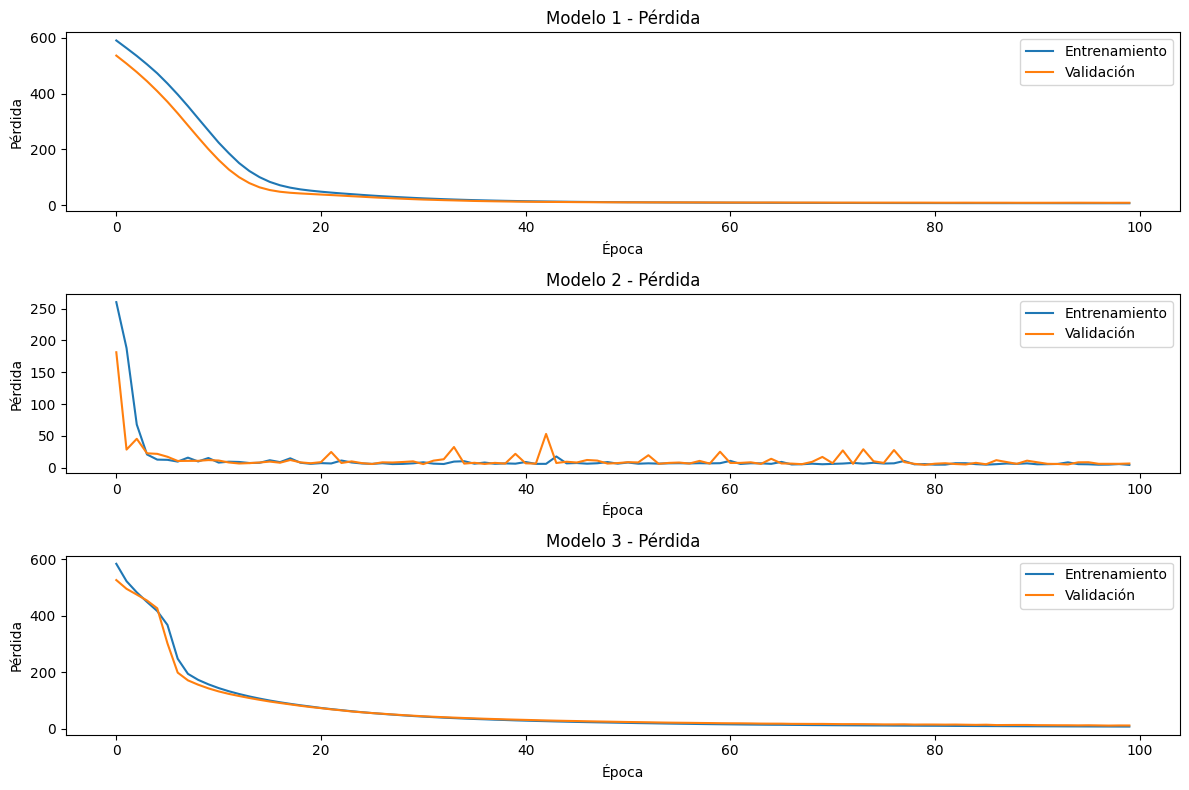

In [18]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))

plt.subplot(3, 1, 1)
plt.plot(history1.history['loss'], label='Entrenamiento')
plt.plot(history1.history['val_loss'], label='Validación')
plt.title('Modelo 1 - Pérdida')
plt.xlabel('Época')
plt.ylabel('Pérdida')
plt.legend()

plt.subplot(3, 1, 2)
plt.plot(history2.history['loss'], label='Entrenamiento')
plt.plot(history2.history['val_loss'], label='Validación')
plt.title('Modelo 2 - Pérdida')
plt.xlabel('Época')
plt.ylabel('Pérdida')
plt.legend()

plt.subplot(3, 1, 3)
plt.plot(history3.history['loss'], label='Entrenamiento')
plt.plot(history3.history['val_loss'], label='Validación')
plt.title('Modelo 3 - Pérdida')
plt.xlabel('Época')
plt.ylabel('Pérdida')
plt.legend()

plt.tight_layout()
plt.show()


Ya que tengas tu mejor modelo, toma el archivo mpg_new_data.csv del repositorio y obten las predicciones para estos datos. Compararemos contra los valores reales. Guarda estas predicciones en un archivo CSV, que también adjuntarás en la entrega de la actividad.

In [19]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from google.colab import files

url = "https://raw.githubusercontent.com/DCDPUAEM/DCDP/main/04%20Deep%20Learning/data/auto-mpg.data"
df = pd.read_csv(url, header=0, index_col=0, na_values="?")

# Preprocesamiento
df = df.dropna()
df = pd.get_dummies(data=df, columns=['Origin'], drop_first=True, dtype=int)
df.rename(columns={'Origin_2': 'Europe', 'Origin_3': 'Japan'}, inplace=True)

# Separar las características y el objetivo
X = df.drop('MPG', axis=1).values
y = df['MPG'].values

# Dividir entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.85, random_state=189)

# Normalizar los datos-entrenamiento
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Entrenar modelo-regresión lineal
model = LinearRegression()
model.fit(X_train, y_train)

# Cargar el conjunto de datos mpg_new_data desde GitHub
url_new_data = "https://raw.githubusercontent.com/DCDPUAEM/DCDP/main/04%20Deep%20Learning/data/mpg_new_data.csv"
df_new = pd.read_csv(url_new_data)

# Preprocesar (datos mpg_new_data)
df_new = pd.get_dummies(data=df_new, columns=['Origin'], drop_first=True, dtype=int)
df_new.rename(columns={'Origin_2': 'Europe', 'Origin_3': 'Japan'}, inplace=True)

# Comparar que haya misma columnas
missing_cols = set(df.columns) - set(df_new.columns)
for col in missing_cols:
    df_new[col] = 0

# Reordenar df
df_new = df_new[df.columns]

# Normalizar los datos de mpg_new_data usando el mismo scaler
X_new = df_new.drop('MPG', axis=1).values
X_new_scaled = scaler.transform(X_new)

# predicciones modelo entrenado
predictions = model.predict(X_new_scaled)

# predicciones al DataFrame original de mpg_new_data (se agregan)
df_new['Predicted_MPG'] = predictions

#archivo CSV
df_new.to_csv('predictions_mpg_new_data.csv', index=False)

# archivo CSV con las predicciones
files.download('predictions_mpg_new_data.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [20]:
print(df_new.columns)

Index(['MPG', 'Cylinders', 'Displacement', 'Horsepower', 'Weight',
       'Acceleration', 'Model Year', 'Europe', 'Japan', 'Predicted_MPG'],
      dtype='object')


In [21]:
print(df.columns)

Index(['MPG', 'Cylinders', 'Displacement', 'Horsepower', 'Weight',
       'Acceleration', 'Model Year', 'Europe', 'Japan'],
      dtype='object')
